In [1]:
import os
import tarfile
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from zlib import crc32
from sklearn.model_selection import train_test_split

In [2]:
download_root = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
housing_path = os.path.join("datasets", "housing")
housing_url = download_root + "datasets/housing/housing.tgz"
def fetch_data(h_url = housing_url, h_path = housing_path):
    os.makedirs(h_path, exist_ok= True)
    tqz_path = os.path.join (h_path, "housing.tgz")
    urllib.request.urlretrieve(h_url, tqz_path)
    housing_tgz = tarfile.open(tqz_path)
    housing_tgz.extractall(path = h_path)
    housing_tgz.close()
    
fetch_data()


In [3]:
def load_housing_data(h_path = housing_path):
    csv_path = os.path.join(h_path,"housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


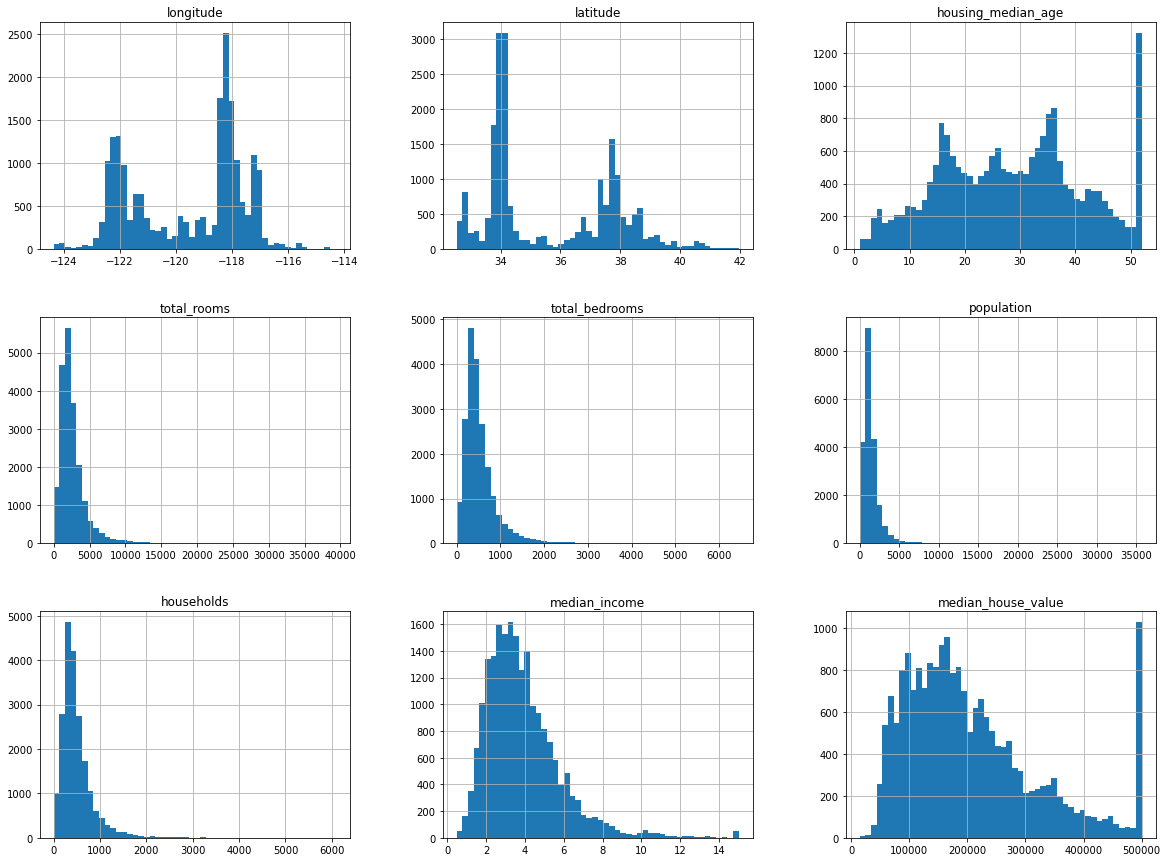

In [7]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
def split_data(data, test_ratio):   # learning how to split data into train and test
    shuffling_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffling_indices[:test_set_size]
    train_indices = shuffling_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# train_set , test_set = split_data(housing, 0.2)
# print (len(train_set))
# print (len(test_set))

In [9]:
# the mind behind using sklearn train_test_split
def test_set_checker(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff <test_ratio * 2**32

def split_train_test_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_checker(id_,test_ratio))
    return data.iloc[~in_test_set], data.iloc[in_test_set]

# housing_with_id = housing.reset_index()
# train_set, test_set = split_train_test_id(housing_with_id, 0.2, "index")

In [10]:
train_set , test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
print (len(train_set))
print (len(test_set))

16512
4128


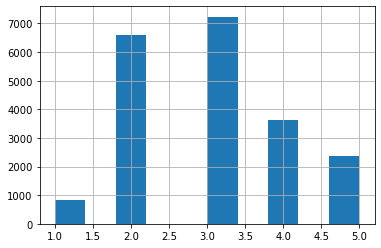

In [11]:
#aking sure that test_set has all type of variety data..using stratified sampling
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins = [0,1.5,3.0,4.5,6.0,np.inf],
                               labels = [1,2,3,4,5]
                              )
housing["income_cat"].hist()

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

strat_test_set["income_cat"].value_counts()/ len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [13]:
strat_train_set.head()
strat_test_set = strat_test_set.drop(columns = ["income_cat"])
strat_train_set = strat_train_set.drop(columns = ["income_cat"])
strat_train_set.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


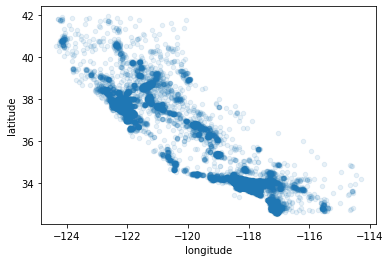

In [14]:
# having only train dataset
housing = strat_train_set.copy()
housing.plot(kind= "scatter", x = "longitude", y= "latitude", alpha = 0.1)

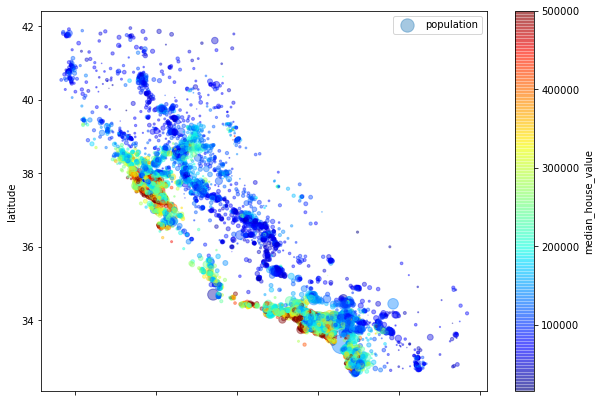

In [15]:
#visualising housing price with the population
housing.plot(kind="scatter", x = "longitude", y= "latitude", alpha = 0.4 , 
             s= housing["population"]/100, label = "population",
             figsize = (10,7), c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True)
plt.legend()

In [16]:
#correlation also called Pearson's r 
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

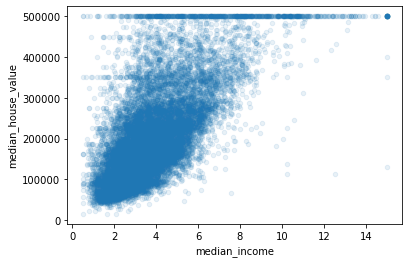

In [17]:
housing.plot(kind="scatter" , x = "median_income" , y="median_house_value", alpha = 0.1)

In [18]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

In [19]:
#data cleaning 
from sklearn.impute import SimpleImputer #it only does on numerical dataset so remove all the object types
#dealing with numerical data
housing_num = housing.drop("ocean_proximity" , axis =1)

imputer = SimpleImputer(strategy="median")

imputer.fit(housing_num)

# imputer.statistics_

X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [20]:
#dealing with catergorial data
housing_category = housing[["ocean_proximity"]]
housing_category.head(10)

#converting categorical data into numeric form using encoder
#will assume that two nearby values are more similar than two distinct values
#it good for cases like (good, bad, excellent) but not for this
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_encoded = ordinal_encoder.fit_transform(housing_category)
housing_encoded[:10]

print (ordinal_encoder.categories_)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [21]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_category)
housing_cat_1hot

print(housing_cat_1hot.toarray())

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [22]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, population_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attribute_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attr = attribute_adder.transform(housing.values)
# housing_extra_attr

In [23]:
#transformation pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


num_pipeline = Pipeline([
    ('imputer' , SimpleImputer(strategy="median")),
    ('attribute_adder', CombinedAttributesAdder()),
    ('std_scalar', StandardScaler())
])


housing_num_tr = num_pipeline.fit_transform(housing_num)
# housing_num_tr

In [24]:
from sklearn.compose import ColumnTransformer

num_attr = list(housing_num)
cat_attr = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num" , num_pipeline, num_attr),
    ("cat", OneHotEncoder(), cat_attr)
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [25]:
#making linearregration model
from sklearn.linear_model import LinearRegression

ling_reg = LinearRegression()
ling_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [32]:
#checking on few data
some_Data = housing.iloc[:10]
some_label = housing_labels.iloc[:10]
some_data_prepared = full_pipeline.transform(some_Data)
print ("predictions:" , ling_reg.predict(some_data_prepared))

print("labels:", list(some_label))

predictions: [210528.01750105 317824.00920324 210815.82440675  59307.5245779
 189946.78983305 154280.53440823 426851.16211477 228018.98515463
 139991.24567056  30327.11892378]
labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0, 127900.0, 500001.0, 140200.0, 95000.0, 500001.0]


In [30]:
from sklearn.metrics import mean_squared_error
housing_prediction = ling_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68635.59352516982

In [34]:
#making decisiontree model
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_prediction_tree = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_prediction_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviaition:", scores.std())
    
display_scores(tree_rmse_scores)
#definitely overfitting the first model

Scores: [71952.3229785  64922.99391881 73557.18664912 71474.48320322
 70451.91922437 73699.00556564 69951.92547176 71220.2557093
 68498.01436491 67420.46400824]
Mean: 70314.85710938684
Standard deviaition: 2602.15407764191


In [40]:
lin_scores = cross_val_score(ling_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error" , cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66766.45709378 66946.32641443 70383.7768715  74492.90867474
 68042.55318962 71196.31002382 64970.55439792 68285.42317144
 70979.08678909 67669.43810464]
Mean: 68973.28347309827
Standard deviaition: 2635.540722824581


In [42]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

forest_prediction = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, forest_prediction)
forest_rmse = np.sqrt(forest_mse)

forest_rmse



18501.401400680836

In [43]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error" , cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [48631.32240192 46470.24543294 49405.45499356 51030.51244372
 48523.98205635 52814.30726749 48447.76602001 51496.47670211
 51257.79114536 49355.36732747]
Mean: 49743.32257909139
Standard deviaition: 1784.221662539271


In [ ]:
#goodpractice to save your models
# import joblib
# joblib.dump(my_model, "mymodelpkl")
#later
#mymodelloaded = joblib.load("mymodelpkl")

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators' : [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap' : [False], 'n_estimators' : [3,10], 'max_features' : [2,3,4]}
]
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [45]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [46]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [48]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

66969.30180675091 {'max_features': 2, 'n_estimators': 3}
57320.36202828493 {'max_features': 2, 'n_estimators': 10}
54327.0282221047 {'max_features': 2, 'n_estimators': 30}
63402.88033689683 {'max_features': 4, 'n_estimators': 3}
54663.89142721049 {'max_features': 4, 'n_estimators': 10}
52229.41511192324 {'max_features': 4, 'n_estimators': 30}
61993.203283765855 {'max_features': 6, 'n_estimators': 3}
54254.0996271431 {'max_features': 6, 'n_estimators': 10}
51430.82549076215 {'max_features': 6, 'n_estimators': 30}
60306.65770079852 {'max_features': 8, 'n_estimators': 3}
53128.1842933067 {'max_features': 8, 'n_estimators': 10}
51282.158876044174 {'max_features': 8, 'n_estimators': 30}
63670.01793417187 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
56434.317115699225 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
62558.482656984095 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
54588.38963711194 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [49]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.01650467e-01, 8.63014301e-02, 4.39302239e-02, 2.12054804e-02,
       2.25337870e-02, 2.98373623e-02, 2.00273749e-02, 3.94522735e-01,
       4.77322298e-02, 0.00000000e+00, 5.99616701e-02, 1.37571388e-02,
       1.47553585e-01, 1.36571704e-04, 3.99405413e-03, 6.85588949e-03])

In [53]:
extra_attr = ["rooms_per_hold", "pop_per_hold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attr = list(cat_encoder.categories_[0])
attr = num_attr + extra_attr + cat_one_hot_attr
sorted(zip(feature_importances, attr), reverse= True)

[(0.394522735298197, 'median_income'),
 (0.14755358545934102, 'INLAND'),
 (0.10165046660764461, 'longitude'),
 (0.08630143010563764, 'latitude'),
 (0.059961670057244086, 'bedrooms_per_room'),
 (0.04773222981952615, 'rooms_per_hold'),
 (0.043930223917756805, 'housing_median_age'),
 (0.02983736225422895, 'population'),
 (0.022533786972806887, 'total_bedrooms'),
 (0.021205480418772068, 'total_rooms'),
 (0.020027374938919793, 'households'),
 (0.013757138833205887, '<1H OCEAN'),
 (0.006855889487287906, 'NEAR OCEAN'),
 (0.0039940541256737174, 'NEAR BAY'),
 (0.00013657170375753415, 'ISLAND'),
 (0.0, 'pop_per_hold')]

In [54]:
#finally testing testset

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis = 1)
Y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

47691.449150046894

In [57]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - Y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale = stats.sem(squared_errors)))

array([45754.17323829, 49553.04506631])